In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("C:\\Users\\CAPACITI-JHB\\Desktop\\Heart_Disease_Prediction\\Heart_Disease_Prediction.csv")
df.head(10)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,270.0,134.500000,78.086491,0.0,67.25,134.5,201.75,269.0
Age,270.0,54.433333,9.109067,29.0,48.00,55.0,61.00,77.0
Sex,270.0,0.677778,0.468195,0.0,0.00,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.00,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.00,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.00,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.00,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.00,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.00,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.00,0.0,1.00,1.0


In [4]:
df.describe(include='object').T

,count,unique,top,freq
Heart Disease,270,2,Absence,150


In [5]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
index                      0.0
Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease              0.0
dtype: float64

Duplicate Rows (%):
0.0


In [6]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

Number of Outliers: 98
Outlier Ratio: 36.30%


In [7]:
print(df.dtypes)

index                        int64
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object


In [8]:
missing_values = df.isnull().sum() 
print(missing_values)

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [9]:
rows_with_nulls = df.isnull().any(axis=1).sum()
print(f"Number of rows with null values: {rows_with_nulls}")

Number of rows with null values: 0


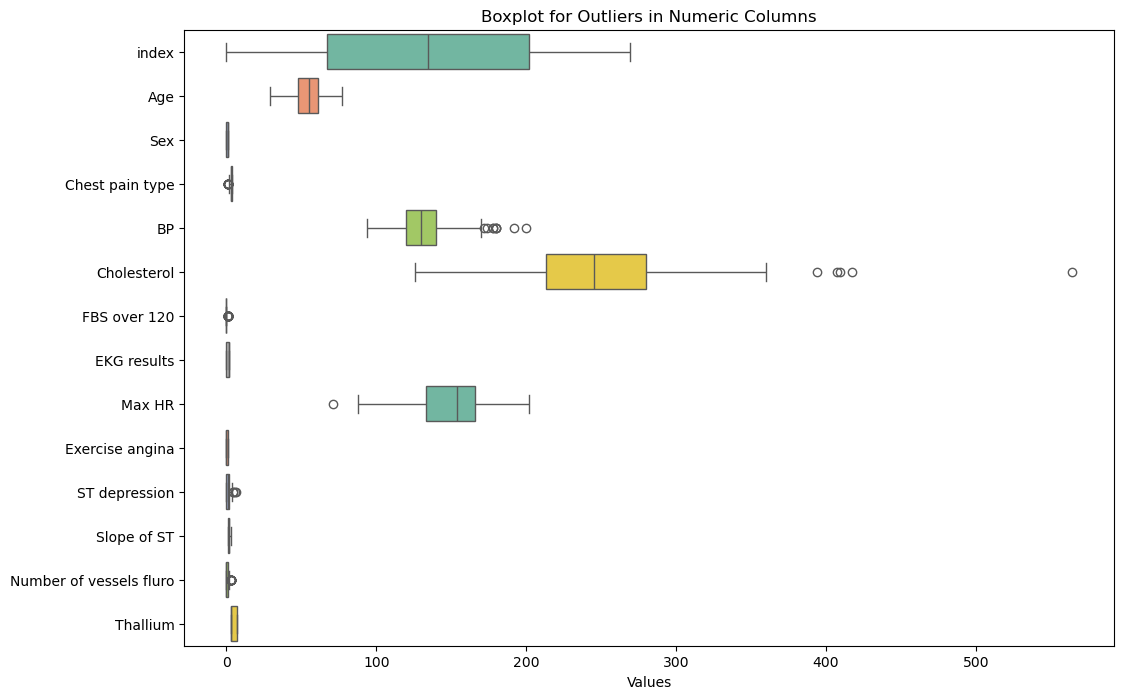

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset
# Boxplot for detecting outliers (for numeric columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h', palette='Set2')
plt.title('Boxplot for Outliers in Numeric Columns')
plt.xlabel('Values')
plt.show()


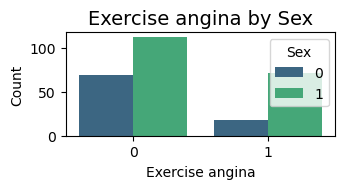

In [11]:
# Exercise angina by Gender
plt.subplot(3, 2, 2)
sns.countplot(x='Exercise angina', hue='Sex', data=df, palette='viridis')
plt.title('Exercise angina by Sex', fontsize=14)
plt.xlabel('Exercise angina')
plt.ylabel('Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

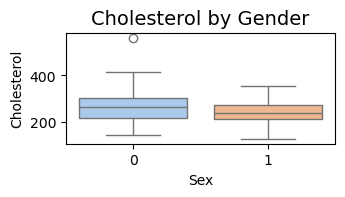

In [12]:

# Cholesterol level distribution
plt.subplot(3, 2, 3)
sns.boxplot(x='Sex', y='Cholesterol', data=df, hue='Sex', palette='pastel', legend=False)
plt.title('Cholesterol by Gender', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Cholesterol')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

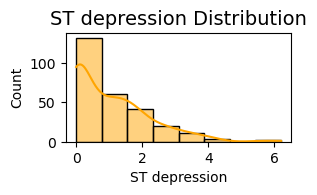

In [13]:
# 4. Air pollution exposure distribution
plt.subplot(3, 2, 4)
sns.histplot(df['ST depression'], bins=8, kde=True, color='orange')
plt.title('ST depression Distribution', fontsize=14)
plt.xlabel('ST depression')
plt.ylabel('Count')

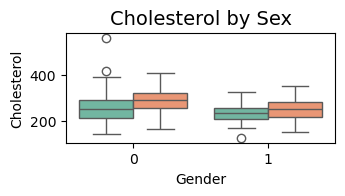

In [14]:
# 6. Cholesterol Level by Gender
plt.subplot(3, 2, 6)
sns.boxplot(x='Sex', y='Cholesterol', data=df, palette='Set2', hue='Heart Disease', legend=False)
plt.title('Cholesterol by Sex', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Cholesterol')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()